In [79]:
# Reto extrayendo información

In [80]:
# importamos librerias
import requests
from bs4 import BeautifulSoup

In [81]:
# Obtenemos la pagina web con el metodo requests.get
link_principal = 'https://www.pagina12.com.ar/'
pagina_principal = requests.get(link_principal)
pagina_principal.status_code

200

In [82]:
# parseamos la pagina web
soup = BeautifulSoup(pagina_principal.text,'lxml')
type(soup)

bs4.BeautifulSoup

In [83]:
def obtener_notas(soup):
    #Función  que recibe un objeto de BeautifullSoup de una página de una sección y devuelve una lista de URLS a las notas de esa sección
    #Secciones -> creamos un array de todos los elementos con el tag DIV que tengan el atributo class=p12-dropdown-column
    # Selecionamos nuestro primer elemento
    # lista vacia para links de notas de secciones
    URL = []
    
    secciones = soup.find('ul', attrs={'class':'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
    #Busca los tag a para optener el href que contiene el link de la seccion
    #recorremos el array de tag a y obtemos los elementos href que contienen links
    href_link_secciones=[link.a.get('href') for link in secciones]
    #seleccionamos el primer link que corresponde a la seccion el pais
    pagina_seccion_el_pais= requests.get(href_link_secciones[0])
     #parseamos la pagina seccion el pais
    soup_pagina_seccion_el_pais= BeautifulSoup(pagina_seccion_el_pais.text,'lxml')
     #la pagina de articulos de noticias se dividen en 3 sectores
    #Top (1 noticia principal) - Semi(2 noticias semiprincipales) -  articulos (el resto de noticias)

    #TOP
    top_noticias_seccion_el_pais = soup_pagina_seccion_el_pais.find('div', attrs={'class':'article-item__content'})
    # Obtener el link
    link_top_noticias_seccion_el_pais = [link_principal + top_noticias_seccion_el_pais.a.get('href')]
    #SEMI
    semi_noticias_seccion_el_pais = soup_pagina_seccion_el_pais.find_all('h3', attrs={'class':'title ff-26px-w800-ls-07'})
    link_semi_noticias_seccion_el_pais=[link_principal + link.a.get('href') for link in semi_noticias_seccion_el_pais]
    # ARTICULOS
    articulos_noticias_seccion_el_pais= soup_pagina_seccion_el_pais.find_all('h4', attrs={'class':'title is-display-inline ff-22px-w700-ls-07'})
    link_articulos_noticias_seccion_el_pais=[link_principal + link.a.get('href') for link in articulos_noticias_seccion_el_pais]

    URL.extend(link_top_noticias_seccion_el_pais)    
    URL.extend(link_semi_noticias_seccion_el_pais)
    URL.extend(link_articulos_noticias_seccion_el_pais)

    return URL

   

In [84]:
lista_notas = (obtener_notas(soup))
lista_notas

['https://www.pagina12.com.ar//595421-la-pelea-dos-negacionistas',
 'https://www.pagina12.com.ar//595342-katopodis-no-nos-vamos-a-quedar-de-brazos-cruzados',
 'https://www.pagina12.com.ar//595271-hector-recalde-cruzo-a-patricia-bullrich-por-querer-derogar-',
 'https://www.pagina12.com.ar//595348-el-veredicto-en-la-causa-sheraton-iv',
 'https://www.pagina12.com.ar//595352-el-ministerio-del-interior-impulsa-una-declaracion-de-lesivi',
 'https://www.pagina12.com.ar//595358-homenaje-a-los-trabajadores-del-indec-desaparecidos',
 'https://www.pagina12.com.ar//595361-crece-la-tension-entre-el-gobierno-y-la-corte-por-la-cesanti',
 'https://www.pagina12.com.ar//595362-repudian-los-dichos-de-javier-milei-volverian-a-cometer-las-',
 'https://www.pagina12.com.ar//595370-para-el-abogado-de-la-familia-esta-probado-que-fue-una-cacer',
 'https://www.pagina12.com.ar//595406-atentado-a-cfk-la-querella-volvio-a-exigir-el-secuestro-de-l',
 'https://www.pagina12.com.ar//595257-la-ola-de-antiderechos-de-jav

In [85]:
url_nota = lista_notas[0]
# Guarda la primera url
print(url_nota)

https://www.pagina12.com.ar//595421-la-pelea-dos-negacionistas


In [86]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        
        # Extraer el titulo
        try:
            titulo = s_nota.find('h1')
            print('Titulo: ' + titulo.text)
        except AttributeError:
            print('Titulo: Vacío')
       
        # Extraer la fecha
        try:
            fecha = s_nota.find('time', attrs={'datetime': True}).get('datetime')
            print('Fecha publicación: ' + fecha)
        except AttributeError:
            print('Fecha: vacío')
        
        # Extraer copete
        try:
            copete = s_nota.find('h2', attrs={'class':'h4 ff-16px-w700'}).get_text()
            print('Copete: ' + copete)
        except AttributeError:
            print('Copete: Vacío')
        
        # Exteraer volanta
        try:
          volanta = s_nota.find('h2', attrs={'class':'h3.ff-20px-w400'}).get_text()
          print('Volanta: ' + volanta)
        except AttributeError: 
          print('Volanta: vacío')
        
        # Extraer cuerpo
        try:
            cuerpo = s_nota.find('div', attrs={'class':'article-main-content article-text'}).get_text()
            print('Cuerpo: ' + cuerpo)
        except AttributeError:
            print('Cuerpo: vacío')
        # Extraer autor
        try:
            autor = s_nota.find('div', attrs={'class':'author-name.ff-14px-w800'}).get_text()
            print('Autor: ' + autor)
        except AttributeError:
            print('Autor vacío')
except Exception as e:
    print('Error:')
    print(e)
    print('\n')
 # If status is 200 then convert in soup 

Titulo: La pelea dos negacionistas
Fecha publicación: 2023-10-06T00:01:00-03:00
Copete: Bullrich y Villarruel
Volanta: vacío
Cuerpo: En medio de la campaña, JxC y LLA volvieron a cruzarse en el contexto de un aniversario del ataque al Regimiento de Infantería 29 de Formosa. Patricia Bullrich subió a sus redes un "homenaje" y anunció como medida de su posible gobierno una "indemnización" a muertos civiles y militares. Minutos después, Victoria Villarruel envió un "mensaje" a las "víctimas" de lo que encuadró como un "acto terrorista" de Montoneros. La candidata a vice de LLA no sólo volvió así a su militante reivindicación de los dos demonios: también envió un dardo envenenado a la candidata de JxC, nuevo blanco de ataques por su paso por la JP.
Autor vacío


In [98]:
#Extraer imagenes
imagenes = s_nota.find_all('div', attrs={'class':'image-wrapper'}) 
#imagenes = media.find_all('img') # Extraer todas la imagenes
imagenes

[<div class="image-wrapper"><figure><figure class="object-fit-block--contain intrinsic-container intrinsic-container-3x2"><img alt="" class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-10/775265-745865-bullrichspots-0.jpg?h=2a8f7fd0&amp;itok=lh35WXqI"/></figure></figure></div>]

In [106]:
if len(imagenes) == 0: # si las imagenes existen
    print('no se encontraron imagenes')
else:
    imagen = imagenes[0] 
    img_src = imagen.find('img').get('src')
    print(img_src) # imprime solo la src de la etiqueta.

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2023-10/775265-745865-bullrichspots-0.jpg?h=2a8f7fd0&itok=lh35WXqI


In [107]:
img_req = requests.get(img_src) # Requests solo a la imagen

In [108]:
img_req.status_code

200

In [111]:
from IPython.display import Image

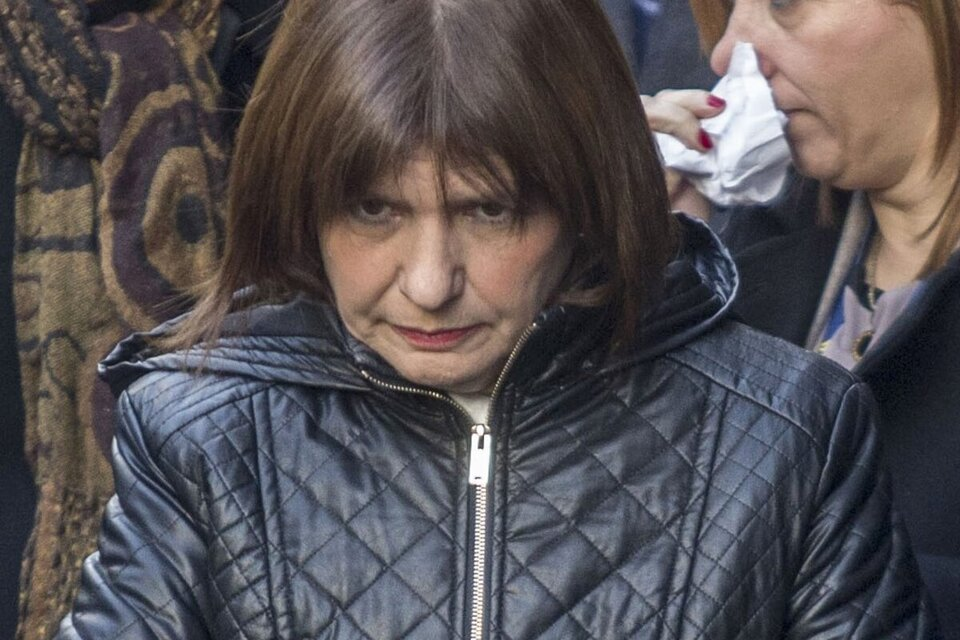

In [112]:
Image(img_req.content)